In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib widget

### Load Data

In [2]:
root_folder = "./COP analysis"
subjects = ['mci002', 'mci004', 'mci005', 'mci006', 'mci007']  # List of subjects
# subjects = ['mci004', 'mci006', 'mci007']  # List of subjects

dataFrames = {}
root = f"{root_folder}/data/compiled_data"
root_files = os.listdir(root)

# files = [file for file in root_files if any(subject in file for subject in subjects) and 'right' not in file]
files = ['mci002_left_df.csv', 'mci004_left_df.csv', 'mci005_left_df.csv', 'mci006_right_df.csv', 'mci007_left_df.csv',]

print(files)
num_rows = len(files) # Add 1 to ensure we have enough rows for an odd number of files

avg_time_columns = ['Date', 'Avg_Step_Time', 'Avg_Swing_Time', 'Avg_Stride_Time']
variability_columns = ['Date', 'Step_Time_Variability', 'Stride_Time_Variability']
speed_columns = ['Date', 'Avg_COP_Speed']#, 'Avg_Gait_Speed']
activity_columns = ['Date', 'Total_Activity_Time_minutes']

['mci002_left_df.csv', 'mci004_left_df.csv', 'mci005_left_df.csv', 'mci006_right_df.csv', 'mci007_left_df.csv']


### Population Mean and Standard Deviation

In [3]:
# Initialize empty lists to store data for all subjects
all_subject_timings = []
all_subject_variability = []
all_subject_speed = []
all_subject_activity = []
activity_per_subject = []

# Loop through each subject
for subject in subjects:
    # Construct the file paths for left and right data
    left_file_path = os.path.join(root_folder, 'data', 'compiled_data', f'{subject}_left_df.csv')
    right_file_path = os.path.join(root_folder, 'data', 'compiled_data', f'{subject}_right_df.csv')

    # Read the data for left and right sides
    df_left = pd.read_csv(left_file_path)
    df_right = pd.read_csv(right_file_path)

    # Convert 'Date' column to datetime
    df_left['Date'] = pd.to_datetime(df_left['Date'], format='%Y-%m-%d')
    df_right['Date'] = pd.to_datetime(df_right['Date'], format='%Y-%m-%d')

    df_activity = df_left[activity_columns]
    df_avg_time = df_left[avg_time_columns]
    df_variability = df_left[variability_columns]
    df_speed = df_left[speed_columns]

    # Calculate the daily average for the selected columns
    daily_activity = df_activity.groupby('Date').sum()
    daily_avg_time = df_avg_time.groupby('Date').mean()
    daily_variability = df_variability.groupby('Date').mean()
    daily_speed = df_speed.groupby('Date').mean() /100
    

    # Append the daily average data to the list for all subjects
    all_subject_timings.append(daily_avg_time)
    all_subject_variability.append(daily_variability)
    all_subject_speed.append(daily_speed)
    all_subject_activity.append(daily_activity)
    activity_per_subject.append(daily_activity)
    

# Concatenate the data for all subjects into one DataFrame
combined_timings = pd.concat(all_subject_timings)
combined_variability = pd.concat(all_subject_variability)
combined_speed = pd.concat(all_subject_speed)
combined_activity = pd.concat(all_subject_activity)

sample = {
    'timings': {},
    'variability': {},
    'speed': {},
    'activity': {}
}

# Calculate the mean and standard deviation for all subjects as a whole
sample['timings']['mean'] = combined_timings.mean()
sample['timings']['std'] = combined_timings.std()
sample['timings']['min'] = combined_timings.min()
sample['timings']['max'] = combined_timings.max()
sample['variability']['mean'] = combined_variability.mean()
sample['variability']['std'] = combined_variability.std()
sample['variability']['min'] = combined_variability.min()
sample['variability']['max'] = combined_variability.std()
sample['speed']['mean'] = combined_speed.mean()
sample['speed']['std'] = combined_speed.std()
sample['speed']['min'] = combined_speed.min()
sample['speed']['max'] = combined_speed.max()
sample['activity']['mean'] = combined_activity.mean()
sample['activity']['std'] = combined_activity.std()
sample['activity']['min'] = combined_activity.min()
sample['activity']['max'] = combined_activity.max()

sample


{'timings': {'mean': Avg_Step_Time      0.950201
  Avg_Swing_Time     0.885068
  Avg_Stride_Time    1.730711
  dtype: float64,
  'std': Avg_Step_Time      0.329055
  Avg_Swing_Time     0.404912
  Avg_Stride_Time    0.569360
  dtype: float64,
  'min': Avg_Step_Time      0.601347
  Avg_Swing_Time     0.410319
  Avg_Stride_Time    1.018107
  dtype: float64,
  'max': Avg_Step_Time      3.009321
  Avg_Swing_Time     3.121315
  Avg_Stride_Time    4.534474
  dtype: float64},
 'variability': {'mean': Step_Time_Variability      0.987480
  Stride_Time_Variability    1.466114
  dtype: float64,
  'std': Step_Time_Variability      0.685000
  Stride_Time_Variability    0.976549
  dtype: float64,
  'min': Step_Time_Variability      0.248287
  Stride_Time_Variability    0.316173
  dtype: float64,
  'max': Step_Time_Variability      0.685000
  Stride_Time_Variability    0.976549
  dtype: float64},
 'speed': {'mean': Avg_COP_Speed    0.584388
  dtype: float64,
  'std': Avg_COP_Speed    0.253863
  dtype:

In [26]:
# Calculate the mean and standard deviation for all subjects as a whole
for df in all_subject_timings:
    df['Combined_Time'] = df['Avg_Step_Time'] + df['Avg_Swing_Time']

    # Calculate the percentage
    df['Step_Time_Percentage'] = (df['Avg_Step_Time'] / df['Combined_Time']) * 100
    df['Swing_Time_Percentage'] = (df['Avg_Swing_Time'] / df['Combined_Time']) * 100

    print(df['Step_Time_Percentage'].mean(),
          df['Swing_Time_Percentage'].mean())

54.86614698910901 45.13385301089099
50.262387898115165 49.737612101884835
48.77203665935855 51.22796334064144
54.66213985984747 45.337860140152536
51.561907251221314 48.43809274877867


In [4]:
for subject in activity_per_subject:
    print(subject.mean())

Total_Activity_Time_minutes    12.651389
dtype: float64
Total_Activity_Time_minutes    14.557889
dtype: float64
Total_Activity_Time_minutes    5.381611
dtype: float64
Total_Activity_Time_minutes    36.093561
dtype: float64
Total_Activity_Time_minutes    35.845965
dtype: float64


In [5]:
for subject in all_subject_timings:
    print(subject.mean())

Avg_Step_Time      0.868599
Avg_Swing_Time     0.724808
Avg_Stride_Time    1.512971
dtype: float64
Avg_Step_Time      0.954270
Avg_Swing_Time     0.963396
Avg_Stride_Time    1.831383
dtype: float64
Avg_Step_Time      1.165762
Avg_Swing_Time     1.269578
Avg_Stride_Time    2.232029
dtype: float64
Avg_Step_Time      0.944496
Avg_Swing_Time     0.800482
Avg_Stride_Time    1.635715
dtype: float64
Avg_Step_Time      0.879121
Avg_Swing_Time     0.854390
Avg_Stride_Time    1.670049
dtype: float64


In [6]:
for subject in all_subject_variability:
    print(subject.mean())

Step_Time_Variability      0.621638
Stride_Time_Variability    0.806118
dtype: float64
Step_Time_Variability      0.788376
Stride_Time_Variability    1.283403
dtype: float64
Step_Time_Variability      1.615536
Stride_Time_Variability    2.538848
dtype: float64
Step_Time_Variability      0.959197
Stride_Time_Variability    1.419574
dtype: float64
Step_Time_Variability      1.034609
Stride_Time_Variability    1.459368
dtype: float64


In [36]:
for subject in all_subject_speed:
    print(subject.mean())
    
combined_speed.mean()

Avg_COP_Speed    0.67703
dtype: float64
Avg_COP_Speed    0.479875
dtype: float64
Avg_COP_Speed    0.717402
dtype: float64
Avg_COP_Speed    0.473946
dtype: float64
Avg_COP_Speed    0.709594
dtype: float64


Avg_COP_Speed    0.584388
dtype: float64

### Activity

[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >
 <AxesSubplot: >]


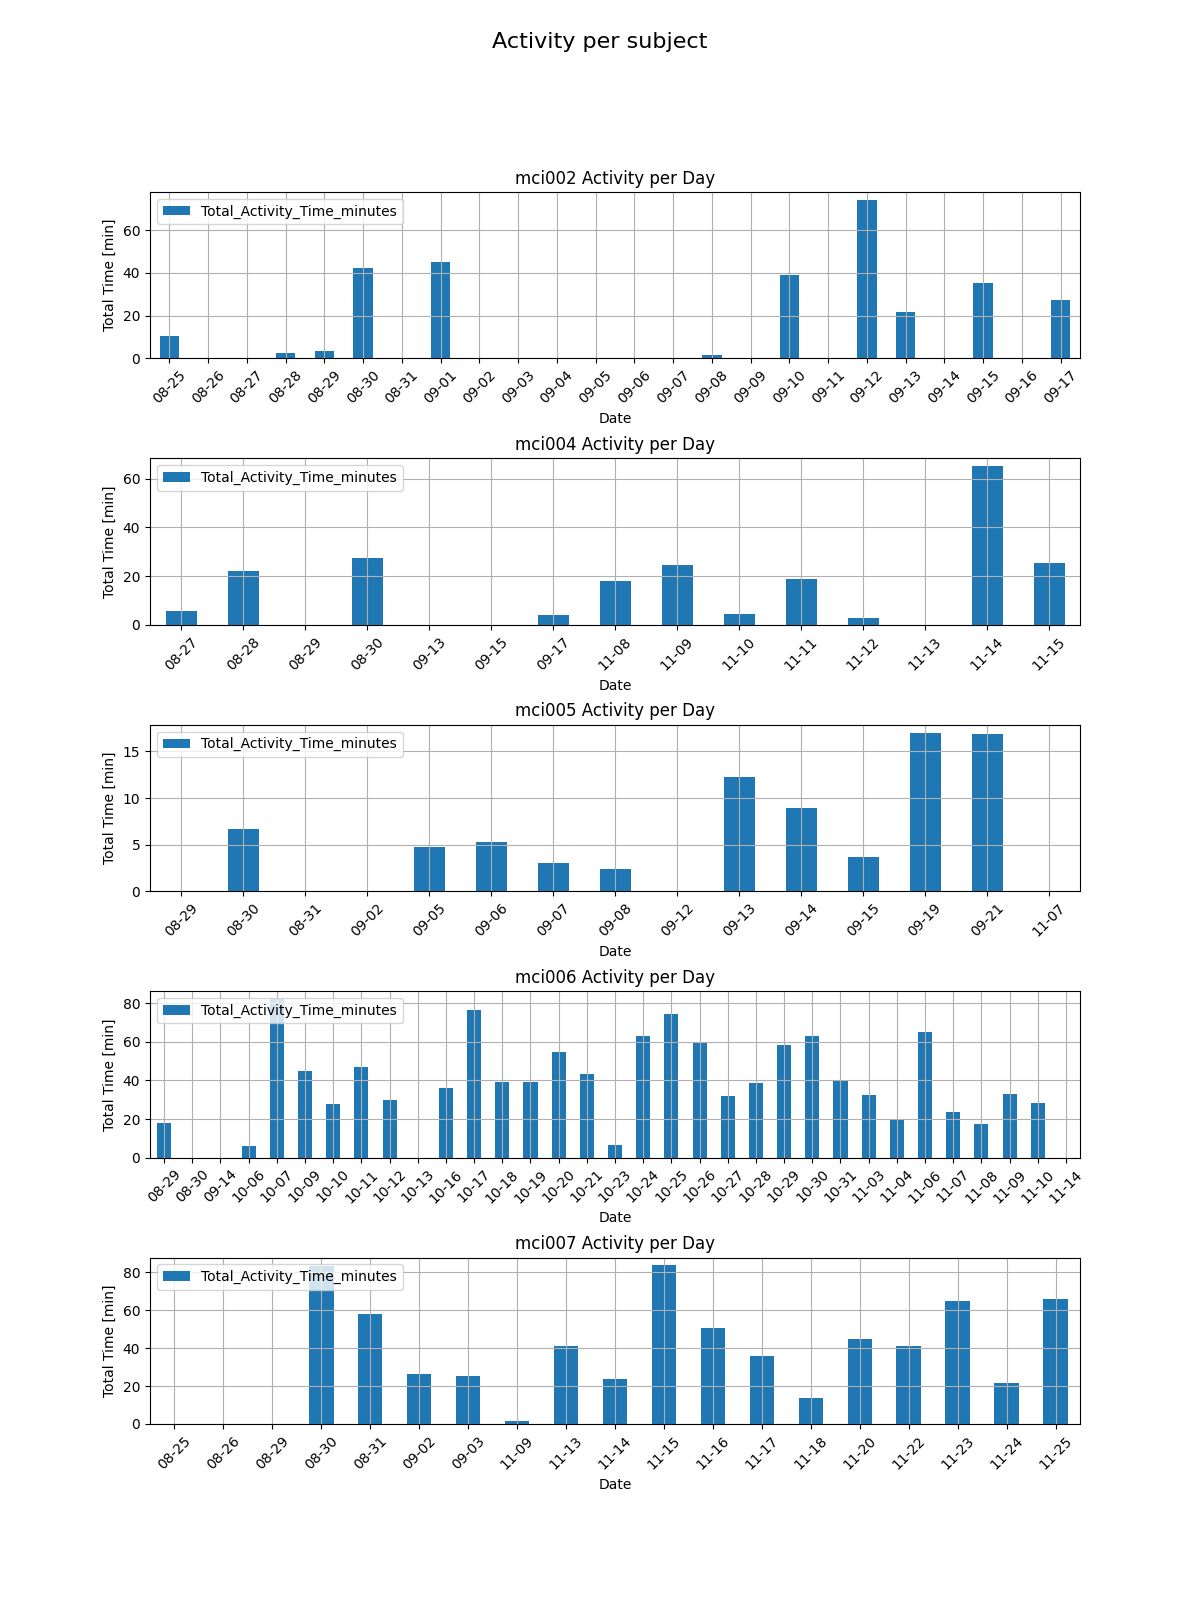

In [8]:
index = 0

fig, axes = plt.subplots(nrows=len(subjects), ncols=1, figsize=(12, 16))
print(axes)
fig.suptitle(f'Activity per subject', fontsize=16)
plt.subplots_adjust(hspace=0.6)

for file in files:
    # if 'left' in file:
    #     print('skip right')
    #     continue 
    
    subject = file.split('_')[0]
    df_left = pd.read_csv(f'{root_folder}/data/compiled_data/{file}')
        
    # Calculate the average per day for the selected columns
    df_activity = df_left[activity_columns]
    daily_activity = df_activity.groupby('Date').sum()

    ax = daily_activity.plot(kind='bar', ax=axes[index])
    ax.set_title(f'{subject} Activity per Day')
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Time [min]')
    ax.legend(loc='upper left')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_activity.index])
    
    index += 1
    

plt.show()

plots_path = f'{root_folder}/plots'
if not os.path.isdir(plots_path):
    os.makedirs(plots_path)
    
plt.savefig(f'{plots_path}/Avg Activity.png')

[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >
 <AxesSubplot: >]


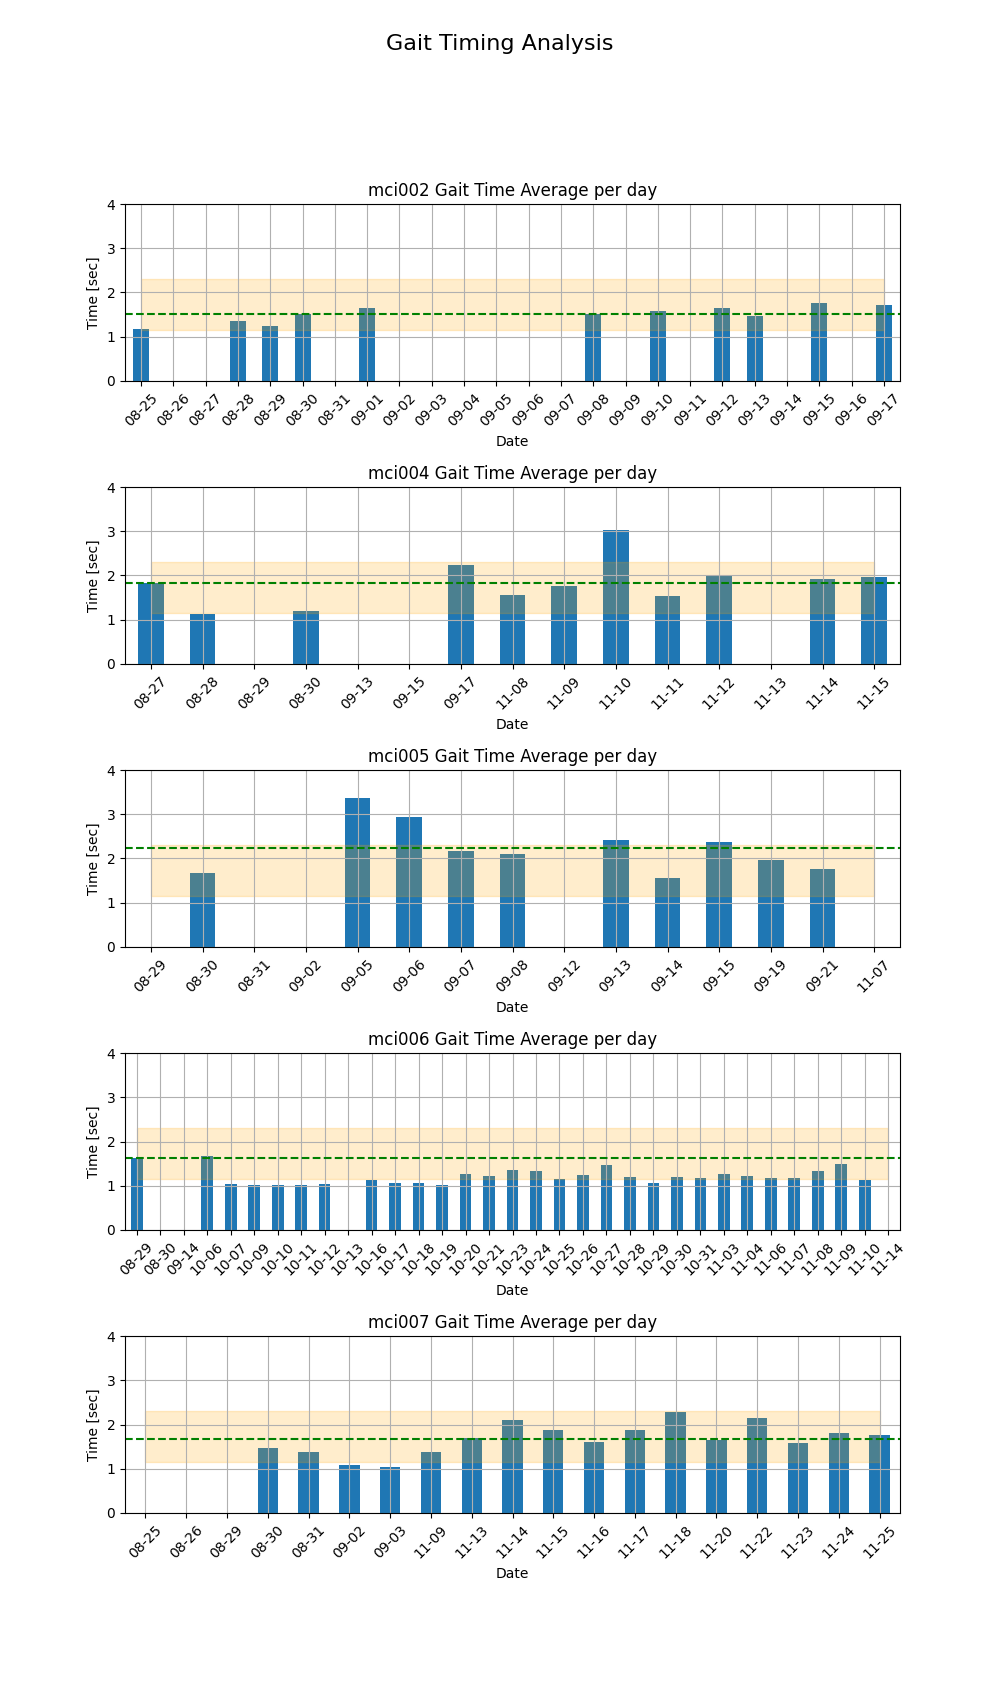

In [30]:
mean_variability = sample['timings']['mean']['Avg_Stride_Time']
std_variability = sample['timings']['std']['Avg_Stride_Time']
upper_bound = mean_variability + std_variability
lower_bound = mean_variability - std_variability

fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(10, 17))
print(axes)
fig.suptitle(f'Gait Timing Analysis', fontsize=16)
plt.subplots_adjust(hspace=0.6)

index = 0
for file in files:
    # if 'right' in file:
    #     print('skip right')
    #     continue 
    
    subject = file.split('_')[0]
    df_left = pd.read_csv(f'{root_folder}/data/compiled_data/{file}')
        
    # Calculate the average per day for the selected columns
    df_avg_time = df_left[avg_time_columns]
    daily_avg_time = df_avg_time.groupby('Date').mean()
    ax = daily_avg_time[['Avg_Stride_Time']].plot(kind='bar', ax=axes[index]) # [0])
    ax.set_title(f'{subject} Gait Time Average per day')
    ax.set_xlabel('Date')
    ax.set_ylabel('Time [sec]')
    ax.get_legend().remove()
    ax.set_ylim(0, 4)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.set_xticks(range(len(daily_avg_time.index)))
    ax.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_avg_time.index])
    ax.fill_between(daily_avg_time.index, lower_bound, upper_bound, alpha=0.2, color='orange', label='Mean ± Std Dev')
    ax.axhline(all_subject_timings[index]['Avg_Stride_Time'].mean(), color='green', linestyle='--')
    # x_values = np.arange(len(daily_avg_time.index))
    # y_values = daily_avg_time['Avg_Stride_Time'].values

    # coefficients = np.polyfit(x_values, y_values, 1)
    # trendline = np.polyval(coefficients, x_values)

    # ax.plot(x_values, trendline, color='red', label='Trendline')
    
    # Plot the selected averages for Avg Time
    # ax1 = daily_avg_time[['Avg_Step_Time', 'Avg_Swing_Time']].plot(kind='bar', ax=axes[index][1])
    # ax1.set_title(f'{subject} Step and Swing Time Average per day')
    # ax1.set_xlabel('Date')
    # ax1.set_ylabel('Time [sec]')
    # ax1.set_ylim(0, 3)
    # ax1.legend(loc='upper left')
    # ax1.tick_params(axis='x', rotation=45)
    # ax1.grid(True)
    # ax1.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_avg_time.index])
    
    index += 1

plt.show()
plots_path = f'{root_folder}/plots'
if not os.path.isdir(plots_path):
    os.makedirs(plots_path)
    
plt.savefig(f'{plots_path}/Avg Timings.png')


### Variability

[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >
 <AxesSubplot: >]


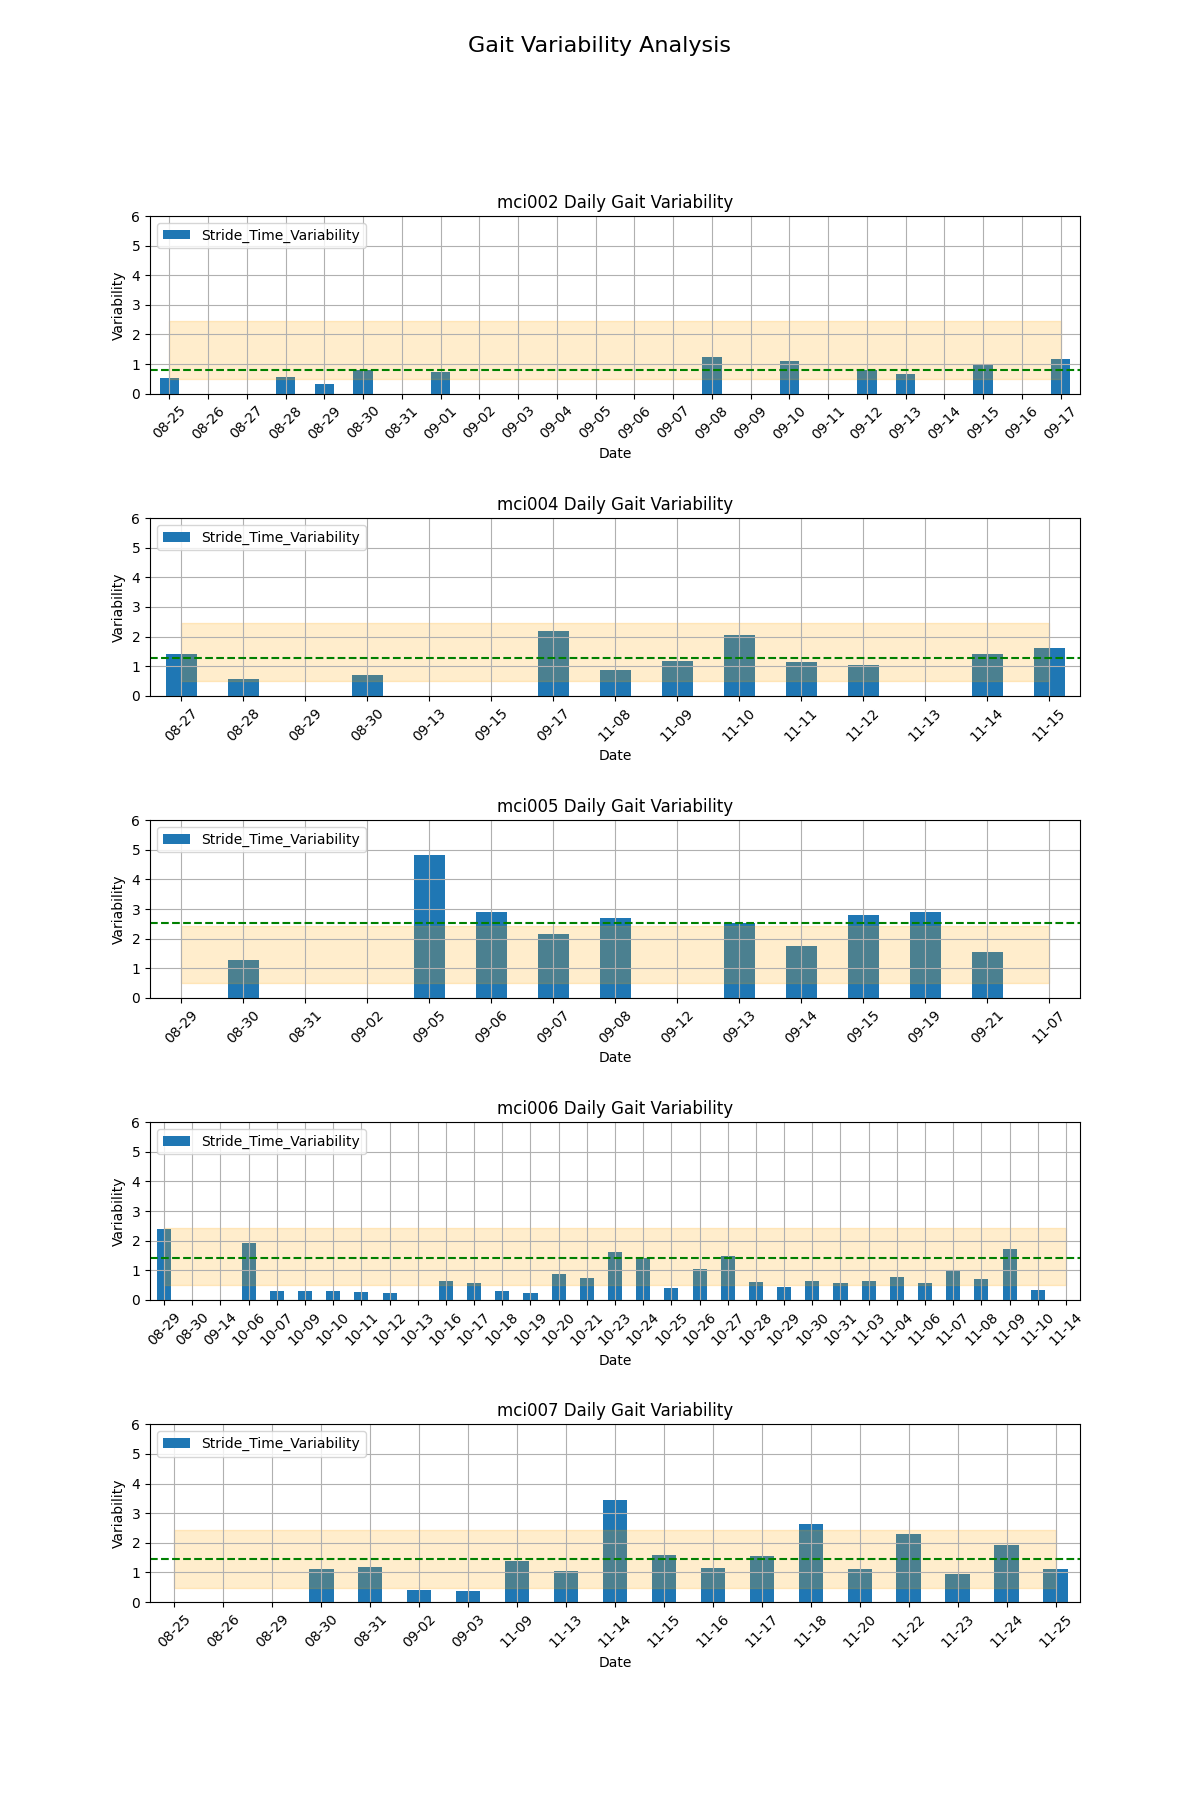

In [10]:
fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(12, 18))
print(axes)
fig.suptitle(f'Gait Variability Analysis', fontsize=16)
plt.subplots_adjust(hspace=0.7)

mean_variability = sample['variability']['mean']['Stride_Time_Variability']
std_variability = sample['variability']['std']['Stride_Time_Variability']
upper_bound = mean_variability + std_variability
lower_bound = mean_variability - std_variability

index = 0
for file in files:
    # if 'right' in file:
    #     print('skip right')
    #     continue 
    
    subject = file.split('_')[0]
    df_left = pd.read_csv(f'{root_folder}/data/compiled_data/{file}')

    df_variability = df_left[['Date', 'Stride_Time_Variability']]

    # Calculate the average per day for the selected columns
    daily_variability = df_variability.groupby('Date').mean()
      
    ax = daily_variability.plot(kind='bar', ax=axes[index])
    ax.set_title(f'{subject} Daily Gait Variability')
    ax.set_xlabel('Date')
    ax.set_ylabel('Variability')
    ax.set_ylim(0,6)
    ax.legend(loc='upper left')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_variability.index])
    ax.fill_between(daily_variability.index, lower_bound, upper_bound, alpha=0.2, color='orange', label='Mean ± Std Dev')
    ax.axhline(all_subject_variability[index]['Stride_Time_Variability'].mean(), color='green', linestyle='--')
    
    
    
    index += 1
    
plt.show()

plots_path = f'{root_folder}/plots'
if not os.path.isdir(plots_path):
    os.makedirs(plots_path)
    
plt.savefig(f'{plots_path}/Avg Variability.png')


[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >
 <AxesSubplot: >]


C:\Users\joonn\AppData\Local\Temp\ipykernel_33876\1480813853.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speed['Avg_COP_Speed'] = df_speed['Avg_COP_Speed'] - 38


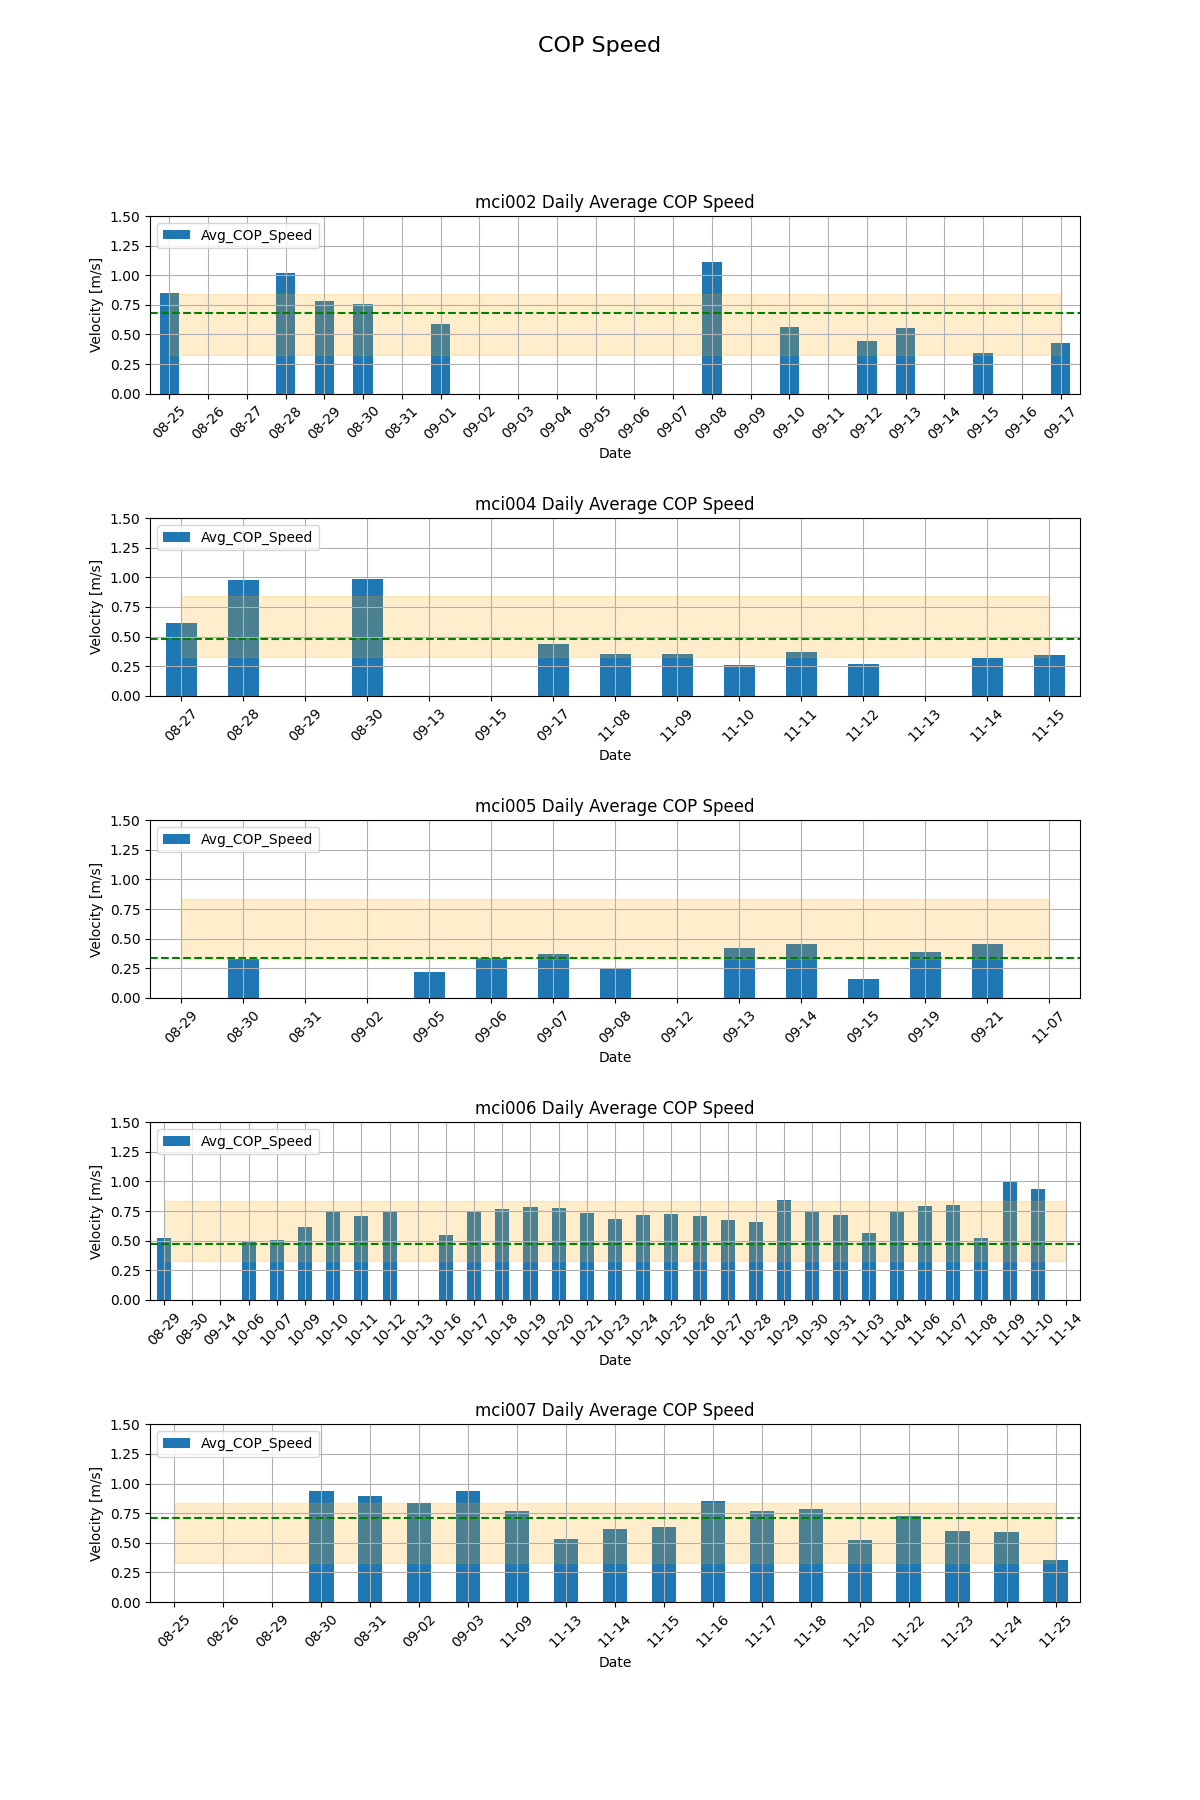

In [51]:
fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(12, 18))
print(axes)
fig.suptitle(f'COP Speed', fontsize=16)
plt.subplots_adjust(hspace=0.7)

mean_speed = sample['speed']['mean']['Avg_COP_Speed']
std_speed = sample['speed']['std']['Avg_COP_Speed']
upper_bound = mean_speed + std_speed
lower_bound = mean_speed - std_speed

index = 0
for file in files:
    # if 'right' in file:
    #     print('skip right')
    #     continue 
    
    subject = file.split('_')[0]
    df_left = pd.read_csv(f'{root_folder}/data/compiled_data/{file}')

    subject_avg = all_subject_speed[index]['Avg_COP_Speed'].mean()

    df_speed = df_left[speed_columns]
    if subject == 'mci005':
        df_speed['Avg_COP_Speed'] = df_speed['Avg_COP_Speed'] - 38
        # print(df_speed['Avg_COP_Speed'] - 50)
        subject_avg -= 0.38

    # Calculate the average per day for the selected columns
    daily_speed = df_speed.groupby('Date').mean() /100
      
    ax = daily_speed.plot(kind='bar', ax=axes[index])
    ax.set_title(f'{subject} Daily Average COP Speed')
    ax.set_xlabel('Date')
    ax.set_ylabel('Velocity [m/s]')
    ax.set_ylim(0,1.5)
    ax.legend(loc='upper left')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_speed.index])
    ax.fill_between(daily_speed.index, lower_bound, upper_bound, alpha=0.2, color='orange', label='Mean ± Std Dev')
    ax.axhline(subject_avg, color='green', linestyle='--')
    
    
    index += 1
    
plt.show()

plots_path = f'{root_folder}/plots'
if not os.path.isdir(plots_path):
    os.makedirs(plots_path)
    
plt.savefig(f'{plots_path}/Avg Speed.png')


### Speed Graph

[[<AxesSubplot: > <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: >]]


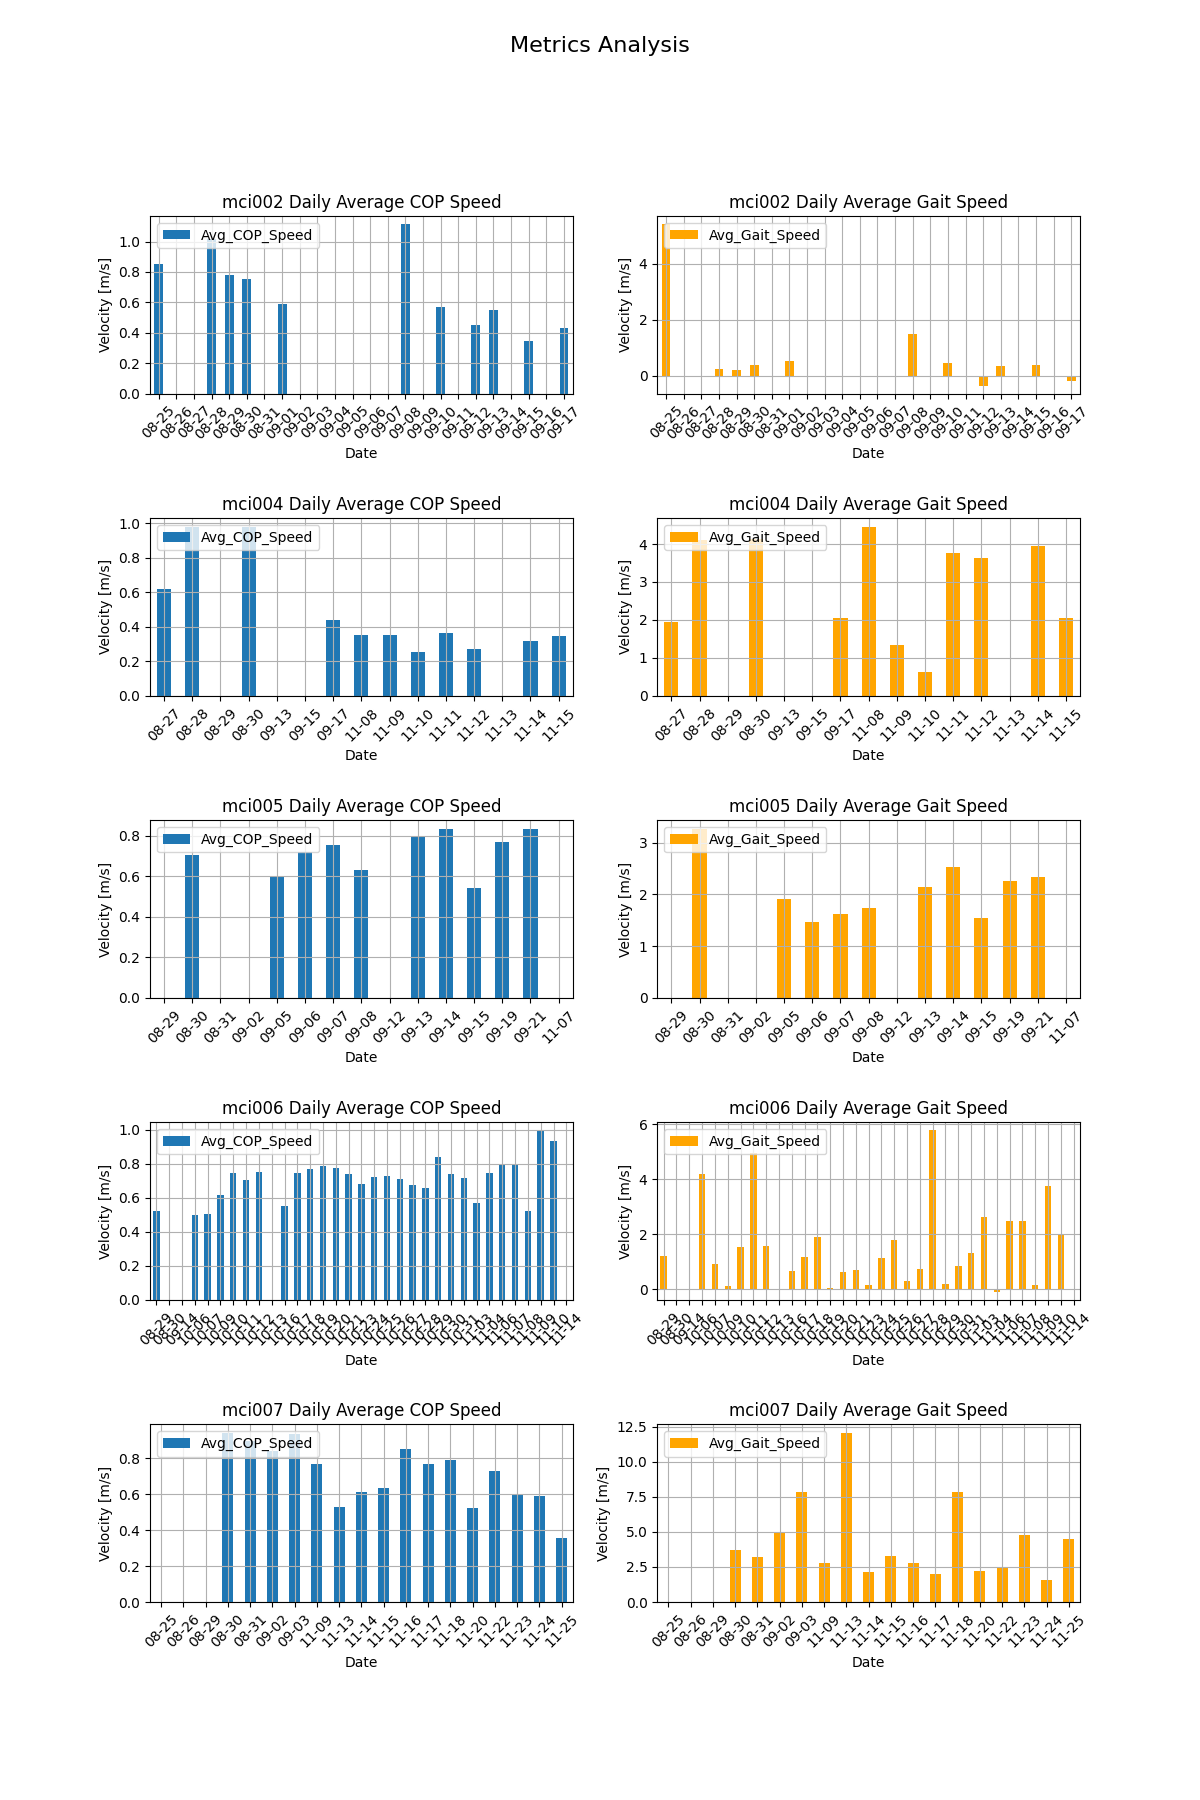

In [12]:

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 18))
print(axes)
fig.suptitle(f'Metrics Analysis', fontsize=16)
plt.subplots_adjust(hspace=0.7)

index = 0
for file in files:
    # if 'right' in file:
    #     print('skip right')
    #     continue 
    
    subject = file.split('_')[0]
    df_left = pd.read_csv(f'{root_folder}/data/compiled_data/{file}')
        
    df_speed = df_left[speed_columns]
    df_gait = df_left[['Date', 'Avg_Gait_Speed']]
    
    # Calculate the average per day for the selected columns
    daily_speed = df_speed.groupby('Date').mean() / 100
    daily_gait = df_gait.groupby('Date').mean() 
    
    ax = daily_speed.plot(kind='bar', ax=axes[index][0])
    ax.set_title(f'{subject} Daily Average COP Speed')
    ax.set_xlabel('Date')
    ax.set_ylabel('Velocity [m/s]')
    ax.legend(loc='upper left')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_speed.index])
    
    # Plot the selected averages for Avg Time
    ax1 = daily_gait.plot(kind='bar', ax=axes[index][1], color='orange')
    ax1.set_title(f'{subject} Daily Average Gait Speed')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Velocity [m/s]')
    ax1.legend(loc='upper left')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True)
    ax1.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_gait.index])
    
    index += 1
    

plt.show()

plots_path = f'{root_folder}/plots'
if not os.path.isdir(plots_path):
    os.makedirs(plots_path)
    
plt.savefig(f'{plots_path}/Avg Speed.png')


### Patient Stats

In [91]:
root_folder = "./COP analysis"
subject = 'mci005'
df_left = pd.read_csv(f'{root_folder}/data/compiled_data/{subject}_left_df.csv')
df_right= pd.read_csv(f'{root_folder}/data/compiled_data/{subject}_left_df.csv')

In [92]:
df_left['Date'] = pd.to_datetime(df_left['Date'], format='%Y-%m-%d')
df_right['Date'] = pd.to_datetime(df_right['Date'], format='%Y-%m-%d')

C:\Users\joonn\AppData\Local\Temp\ipykernel_29180\534269083.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speed.Avg_COP_Speed = df_speed.Avg_COP_Speed / 100


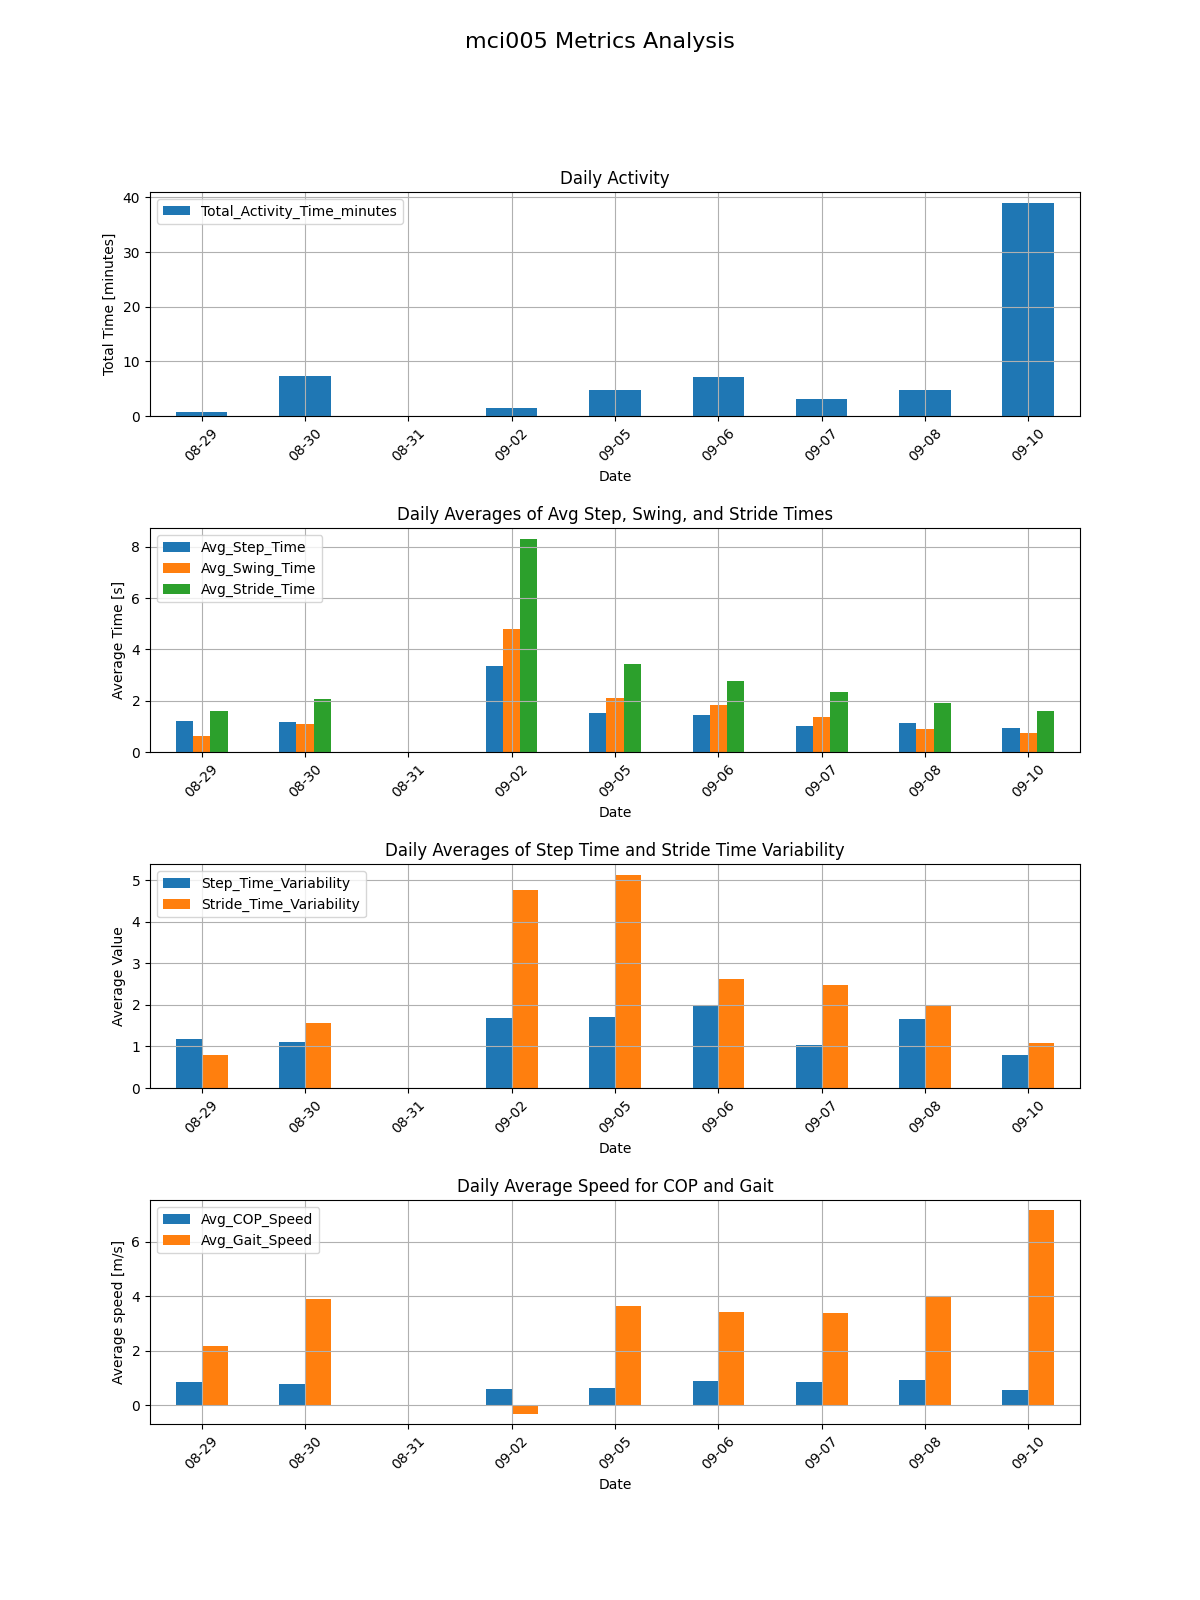

In [93]:
# Select only the columns of interest for Avg Time and Variability
avg_time_columns = ['Date', 'Avg_Step_Time', 'Avg_Swing_Time', 'Avg_Stride_Time']
variability_columns = ['Date', 'Step_Time_Variability', 'Stride_Time_Variability']
speed_columns = ['Date', 'Avg_COP_Speed', 'Avg_Gait_Speed']
activity_columns = ['Date', 'Total_Activity_Time_minutes']

df_avg_time = df_left[avg_time_columns]
df_variability = df_left[variability_columns]
df_activity = df_left[activity_columns]
# df_speed = df_left[speed_columns]
# df_speed.Avg_COP_Speed = df_speed.Avg_COP_Speed / 100

# Calculate the average per day for the selected columns
daily_avg_time = df_avg_time.groupby('Date').mean()
daily_variability = df_variability.groupby('Date').mean()
daily_speed = df_speed.groupby('Date').mean()
daily_activity = df_activity.groupby('Date').sum()

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 16))
fig.suptitle(f'{subject} Metrics Analysis', fontsize=16)
plt.subplots_adjust(hspace=0.5)

ax1 = daily_activity.plot(kind='bar', ax=axes[0])
ax1.set_title('Daily Activity')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Time [minutes]')
ax1.legend(loc='upper left')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# Remove the time portion (00:00:00) from x-axis ticks for Avg Time
ax1.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_activity.index])

# Plot the selected averages for Avg Time
ax2 = daily_avg_time.plot(kind='bar', ax=axes[1])
ax2.set_title('Daily Averages of Avg Step, Swing, and Stride Times')
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Time [s]')
ax2.legend(loc='upper left')

ax2.tick_params(axis='x', rotation=45)
ax2.grid(True)

# Remove the time portion (00:00:00) from x-axis ticks for Avg Time
ax2.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_avg_time.index])

# Plot the selected averages for Variability
ax3 = daily_variability.plot(kind='bar', ax=axes[2])
ax3.set_title('Daily Averages of Step Time and Stride Time Variability')
ax3.set_xlabel('Date')
ax3.set_ylabel('Average Value')
ax3.legend(loc='upper left')

# Remove the time portion (00:00:00) from x-axis ticks for Variability
ax3.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_variability.index])
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True)

# Plot the selected averages for Avg Time
ax4 = daily_speed.plot(kind='bar', ax=axes[3])
ax4.set_title('Daily Average Speed for COP and Gait')
ax4.set_xlabel('Date')
ax4.set_ylabel('Average speed [m/s]')
ax4.legend(loc='upper left')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True)

# Remove the time portion (00:00:00) from x-axis ticks for Avg Time
ax4.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_speed.index])

plt.show()

plots_path = f'{root_folder}/plots/{subject}'
if not os.path.isdir(plots_path):
    os.makedirs(plots_path)
    
plt.savefig(f'{plots_path}/Metrics.png')
